In [1]:
import pandas as pd
import numpy as np

In [2]:
# rolling
# sliding the window (of data column) to for example the next two elements:
df = pd.DataFrame({'A':np.random.randint(0,10,5),
                  'B':np.random.randint(0,10,5),
                  'C':np.random.randint(0,10,5)})
df

,A,B,C
0,9,3,1
1,7,3,6
2,7,2,4
3,7,2,8
4,4,4,9


In [3]:
# for preventing to print the NAN at the first row, using the min_period
df.rolling(2,min_periods=1).sum()

,A,B,C
0,9.0,3.0,1.0
1,16.0,6.0,7.0
2,14.0,5.0,10.0
3,14.0,4.0,12.0
4,11.0,6.0,17.0


In [4]:
df.rolling(4,min_periods=1).mean()

,A,B,C
0,9.000000,3.000000,1.000000
1,8.000000,3.000000,3.500000
2,7.666667,2.666667,3.666667
3,7.500000,2.500000,4.750000
4,6.250000,2.750000,6.750000


In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df = iris.drop(['species'],axis=1)

In [8]:
df.rolling(3,min_periods=1,win_type='gaussian').sum(std=3)

,sepal_length,sepal_width,petal_length,petal_width
0,4.824393,3.310858,1.324343,0.189192
1,9.735201,6.337878,2.724343,0.389192
2,14.170403,9.337928,3.954091,0.578384
3,13.686615,8.970353,4.043282,0.578384
4,13.775807,9.532524,4.054091,0.578384
...,...,...,...,...
145,19.470453,9.164949,16.200150,6.851414
146,18.997473,8.486565,15.321766,6.462222
147,18.786665,8.175757,14.837978,5.967626
148,18.324493,8.581161,15.037978,5.973030


In [9]:
# Where df.where(cond,action)
df = pd.DataFrame(np.arange(10).reshape(5,2),columns=['A','B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [10]:
df.where(df<5,-df)

,A,B
0,0,1
1,2,3
2,4,-5
3,-6,-7
4,-8,-9


In [11]:
df.where((df<5) | (df%3==3), -df)

,A,B
0,0,1
1,2,3
2,4,-5
3,-6,-7
4,-8,-9


In [12]:
idx = (df<5)|(df%3)
idx

,A,B
0,True,True
1,True,True
2,True,True
3,False,True
4,True,False


In [13]:
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [14]:
df.where(idx,-df)

,A,B
0,0,1
1,2,3
2,4,5
3,-6,7
4,8,-9


In [15]:
#another way instead of using the where 
df[(df<5) | (df%3)] = -df
df

,A,B
0,0,-1
1,-2,-3
2,-4,-5
3,6,-7
4,-8,9


In [16]:
# clip (df.clip(lower,upper))
df = pd.DataFrame(np.random.randint(0,50,(5,10)),
                  columns=list('ABCDEFGHIJ'))

In [17]:
df

,A,B,C,D,E,F,G,H,I,J
0,40,9,46,22,40,8,47,45,38,27
1,32,48,32,45,32,22,8,12,22,19
2,22,20,36,10,27,26,29,10,8,18
3,25,47,11,41,36,28,20,4,47,35
4,32,37,17,18,26,30,25,20,11,27


In [18]:
#replace all elements that are greater than 30 and less than 10 by 30 and 10
df.clip(10,30)

,A,B,C,D,E,F,G,H,I,J
0,30,10,30,22,30,10,30,30,30,27
1,30,30,30,30,30,22,10,12,22,19
2,22,20,30,10,27,26,29,10,10,18
3,25,30,11,30,30,28,20,10,30,30
4,30,30,17,18,26,30,25,20,11,27


In [19]:
#another way instead uusing the clip:
df[df<10] = 10 
df[df>30] = 30 
df

,A,B,C,D,E,F,G,H,I,J
0,30,10,30,22,30,10,30,30,30,27
1,30,30,30,30,30,22,10,12,22,19
2,22,20,30,10,27,26,29,10,10,18
3,25,30,11,30,30,28,20,10,30,30
4,30,30,17,18,26,30,25,20,11,27


In [20]:
# merge function (df.merge(df1,df2))
df1 = pd.DataFrame({'E':['B','J','L','S'],
                   'G':['A','E','E','H']})

df2 = pd.DataFrame({'E':['L','B','J','S'],
                   'H':[2004,2008,2012,2018]})  

df1

,E,G
0,B,A
1,J,E
2,L,E
3,S,H


In [21]:
df2

,E,H
0,L,2004
1,B,2008
2,J,2012
3,S,2018


In [22]:
# to join these two databases
pd.merge(df1,df2)

,E,G,H
0,B,A,2008
1,J,E,2012
2,L,E,2004
3,S,H,2018


In [23]:
df3 = pd.merge(df1,df2)
df4 = pd.DataFrame({'G':['A','E','H'],
                   'S':['C','G','S']})
pd.merge(df3,df4,on='G')

,E,G,H,S
0,B,A,2008,C
1,J,E,2012,G
2,L,E,2004,G
3,S,H,2018,S


In [24]:
df5 = pd.DataFrame({'G':['A','A','E','E','H','H'],
                   'SK':['M','S','C','L','S','O']})
df5

,G,SK
0,A,M
1,A,S
2,E,C
3,E,L
4,H,S
5,H,O


In [25]:
df6 = pd.merge(df3,df4,on='G')

In [26]:
pd.merge(df6,df5,on='G')

,E,G,H,S,SK
0,B,A,2008,C,M
1,B,A,2008,C,S
2,J,E,2012,G,C
3,J,E,2012,G,L
4,L,E,2004,G,C
5,L,E,2004,G,L
6,S,H,2018,S,S
7,S,H,2018,S,O


In [27]:
# pivot_table 
from seaborn import load_dataset

In [28]:
T = load_dataset('titanic')
T.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
T.rename(columns={'sex':'Gender'},inplace=True)
T.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
T.deck.isnull().sum()

688

In [31]:
T.drop(['deck'],axis=1,inplace=True)
T.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [32]:
# group by relationships
T.groupby(['Gender','class'])['survived'].mean()

Gender  class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [33]:
# changing the shape to atable by unstack
T.groupby(['Gender','class'])['survived'].mean().unstack()

class,First,Second,Third
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [34]:
#index=row
T.pivot_table('survived',index='Gender', columns='class',aggfunc='mean')

class,First,Second,Third
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [35]:
# for making two group for age
agePartitions = pd.cut(T['age'],[0,18,80])
agePartitions

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [36]:
T.pivot_table('survived',['Gender',agePartitions],'class')

class               First    Second     Third
Gender age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [37]:
farPartitions = pd.qcut(T['fare'],2)

In [38]:
T.pivot_table('survived',['Gender',agePartitions],[farPartitions,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
Gender age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
Gender age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [39]:
T.pivot_table(index='Gender',columns='class',aggfunc=
              {'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
Gender                                                        
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [40]:
T.head()

,survived,pclass,Gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [41]:
#T.Gender.str.upper()
#df.col.str
T.Gender.str.capitalize()

0        Male
1      Female
2      Female
3      Female
4        Male
        ...  
886      Male
887    Female
888    Female
889      Male
890      Male
Name: Gender, Length: 891, dtype: object

In [42]:
# for giving the lenght of all strings
T.embark_town.str.len()

0      11.0
1       9.0
2      11.0
3      11.0
4      11.0
       ... 
886    11.0
887    11.0
888    11.0
889     9.0
890    10.0
Name: embark_town, Length: 891, dtype: float64

In [43]:
 #this embarked on it contains some of the null values:
T.Gender.str.cat(T.embark_town.str)

/tmp/ipykernel_4817/1463249390.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  T.Gender.str.cat(T.embark_town.str)


0        maleSouthampton
1                    NaN
2      femaleSouthampton
3      femaleSouthampton
4        maleSouthampton
             ...        
886      maleSouthampton
887    femaleSouthampton
888    femaleSouthampton
889                  NaN
890                  NaN
Name: Gender, Length: 891, dtype: object

In [44]:
T.embark_town.isnull().sum()

2

In [45]:
"abc,fgh,des".split(',')

['abc', 'fgh', 'des']

In [46]:
# for giving the strings to a list, and -1 is for the lastest string:
#T.col.str.split(',')[-1]

In [47]:
# DateTime (pd.datetime())
from datetime import datetime

In [48]:
# datetime's formats:
dates= pd.to_datetime([datetime(2010,7,3),'10th of July, 2018',
                      '2017-Jul-19','10-09-2016','20160305'])
dates

DatetimeIndex(['2010-07-03', '2018-07-10', '2017-07-19', '2016-10-09',
               '2016-03-05'],
              dtype='datetime64[ns]', freq=None)

In [49]:
dates.to_period('D')

PeriodIndex(['2010-07-03', '2018-07-10', '2017-07-19', '2016-10-09',
             '2016-03-05'],
            dtype='period[D]')

In [50]:
dates-dates[0]

TimedeltaIndex(['0 days', '2929 days', '2573 days', '2290 days', '2072 days'], dtype='timedelta64[ns]', freq=None)

In [52]:
#Plotting with Pandas
df = pd.DataFrame({'A':np.random.normal(0,1,1000),
                  'B':np.random.normal(-2,2,1000),
                  'C':np.random.normal(5,4,1000)})
df.head()

,A,B,C
0,0.801729,0.058920,12.410014
1,0.408653,-2.742724,9.646197
2,-0.730195,-1.323943,3.057672
3,0.807391,-4.289419,-0.418421
4,-0.063010,-2.422524,1.857312


<AxesSubplot:>

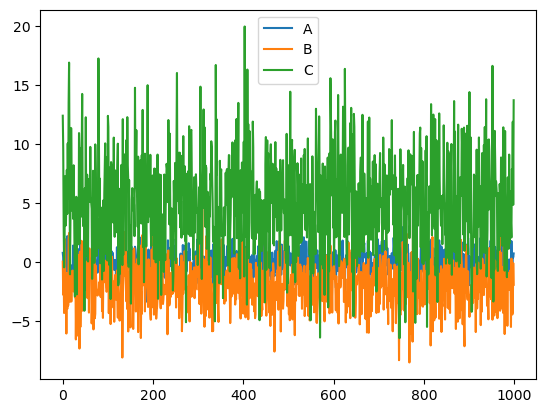

In [53]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

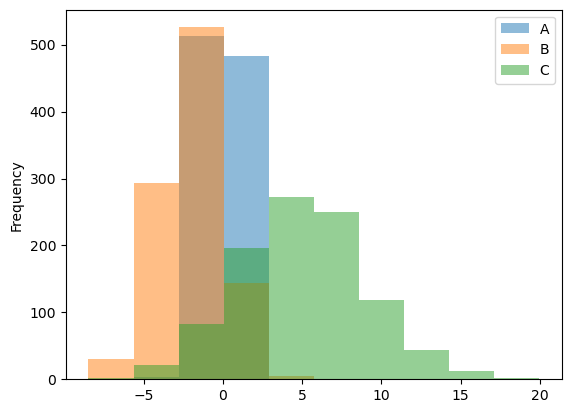

In [54]:
df.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

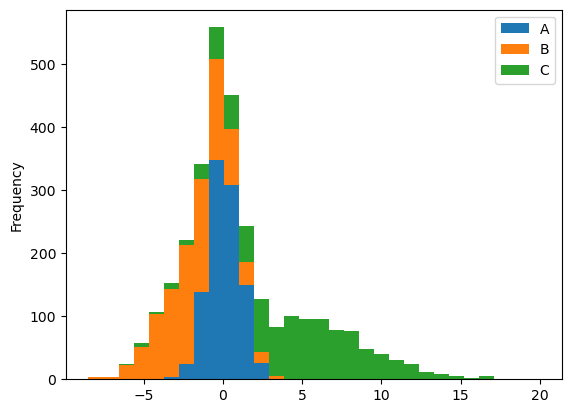

In [55]:
df.plot.hist(stacked=True,bins=30)

<AxesSubplot:ylabel='Frequency'>

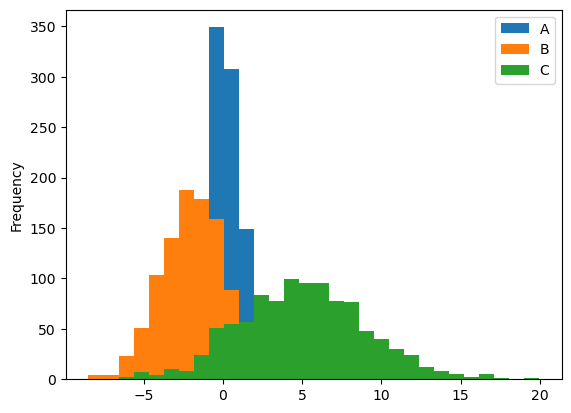

In [56]:
df.plot.hist(stacked=False,bins=30)

<AxesSubplot:>

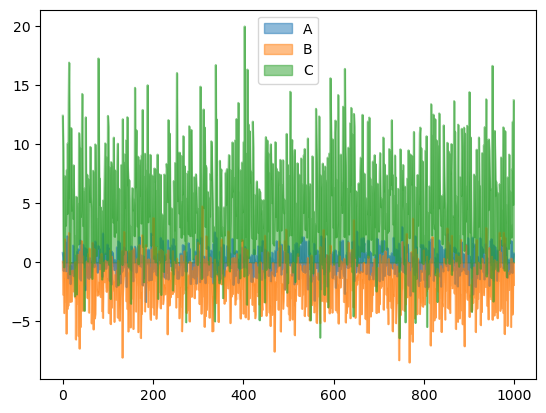

In [58]:
df.plot.area(stacked=False)

<AxesSubplot:>

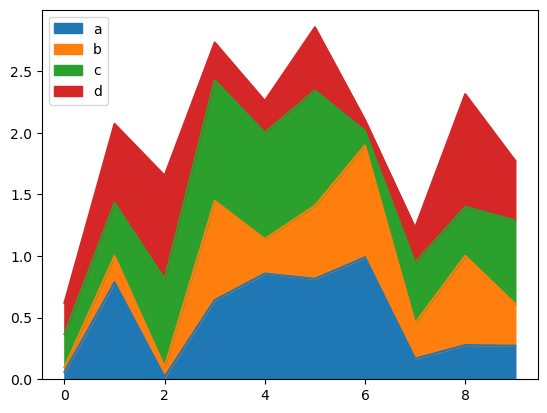

In [60]:
df2 = pd.DataFrame(np.random.rand(10,4),columns=list('abcd'))
df2.plot.area()

<AxesSubplot:>

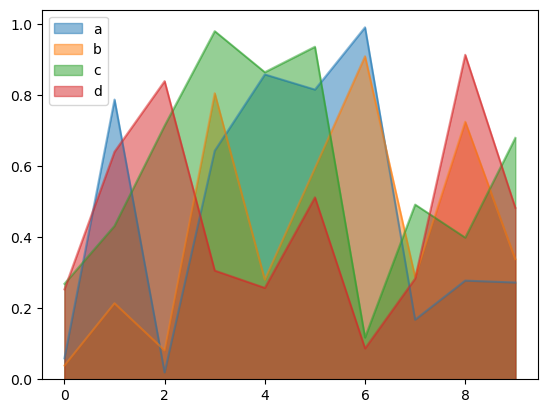

In [61]:
df2.plot.area(stacked=False)

In [62]:
df3 = pd.DataFrame(3*np.random.rand(4,2),
                  index=list('abcd'),
                  columns=list('xy'))
df3

,x,y
a,1.962171,2.234391
b,1.507268,0.298212
c,1.681383,1.098338
d,1.473384,2.984690


array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

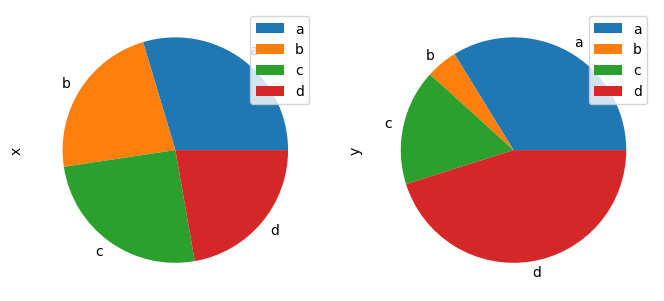

In [64]:
df3.plot.pie(subplots=True,figsize=(8,4))